# Days of week volatility on SP500

**Krzysztof Kamiński**

In this project I want to find out which days of week are related with SP500 high volatility sessions. When I will find out I will calculate median price for outliers set and whole data set for a particular day of week.

In [1]:
# import pandas as a basic data frame libriary
import pandas as pd

We need to downoload SP500 data. I will use finance yahoo for this (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC). Starting date will be 14th of February 2000. End date is 12th of February 2021. Almost 21 years

In [2]:
df = pd.read_csv('SP500.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-14,1387.119995,1394.930054,1380.530029,1389.939941,1389.939941,927300000
1,2000-02-15,1389.939941,1407.719971,1376.250000,1402.050049,1402.050049,1092100000
2,2000-02-16,1402.050049,1404.550049,1385.579956,1387.670044,1387.670044,1018800000
3,2000-02-17,1387.670044,1399.880005,1380.069946,1388.260010,1388.260010,1034800000
4,2000-02-18,1388.260010,1388.589966,1345.319946,1346.089966,1346.089966,1042300000


In [3]:
#drop 'high', 'low', 'adj close' and 'volume'
df = df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'])

In [4]:
df.head()

,Date,Open,Close
0,2000-02-14,1387.119995,1389.939941
1,2000-02-15,1389.939941,1402.050049
2,2000-02-16,1402.050049,1387.670044
3,2000-02-17,1387.670044,1388.260010
4,2000-02-18,1388.260010,1346.089966


In [5]:
#how much days are we talking about?
df.shape

(5284, 3)

In [6]:
#adding daily_return
daily_return = (df['Close']/df['Open']-1)*100

In [7]:
daily_return.head()

0    0.203295
1    0.871268
2   -1.025641
3    0.042515
4   -3.037619
dtype: float64

In [8]:
df['Daily % return'] = daily_return

In [9]:
df.head()

,Date,Open,Close,Daily % return
0,2000-02-14,1387.119995,1389.939941,0.203295
1,2000-02-15,1389.939941,1402.050049,0.871268
2,2000-02-16,1402.050049,1387.670044,-1.025641
3,2000-02-17,1387.670044,1388.260010,0.042515
4,2000-02-18,1388.260010,1346.089966,-3.037619


Now I want to visualize daily returns on plot chart. To do this I need to import matplotlib 

In [10]:
import matplotlib.pyplot as plt

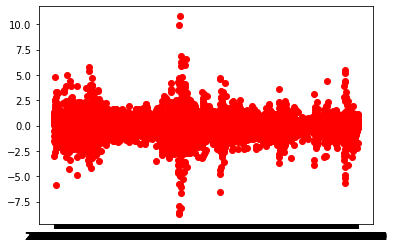

In [11]:
plt.plot(df['Date'], df['Daily % return'], 'ro')

The largest distribution of daily returns is around 0-2%, which is quite not surprising. Indices rarely have higher daily returns.

# Time for adding days of week

In [12]:
all_data = df['Date'][0:5284]

In [13]:
#changing to datetime type so I could change it to days of week
all_data = pd.to_datetime(all_data)

In [14]:
all_data.head()

0   2000-02-14
1   2000-02-15
2   2000-02-16
3   2000-02-17
4   2000-02-18
Name: Date, dtype: datetime64[ns]

In [15]:
#changing datetime values for days of week
all_data = all_data.dt.dayofweek

In [16]:
all_data

0       0
1       1
2       2
3       3
4       4
       ..
5279    0
5280    1
5281    2
5282    3
5283    4
Name: Date, Length: 5284, dtype: int64

"0" stands for Monday and "6" for Sunday. For obvious reasons we will get values from 0 to 4

In [17]:
#adding 'Day of week' column to data frame using create 'all_data'
df['Day of week'] = all_data

In [18]:
df.head()

,Date,Open,Close,Daily % return,Day of week
0,2000-02-14,1387.119995,1389.939941,0.203295,0
1,2000-02-15,1389.939941,1402.050049,0.871268,1
2,2000-02-16,1402.050049,1387.670044,-1.025641,2
3,2000-02-17,1387.670044,1388.260010,0.042515,3
4,2000-02-18,1388.260010,1346.089966,-3.037619,4


In [19]:
df.tail()

,Date,Open,Close,Daily % return,Day of week
5279,2021-02-08,3892.590088,3915.590088,0.590866,0
5280,2021-02-09,3910.489990,3911.229980,0.018923,1
5281,2021-02-10,3920.780029,3909.879883,-0.278010,2
5282,2021-02-11,3916.399902,3916.379883,-0.000511,3
5283,2021-02-12,3911.649902,3934.830078,0.592593,4


In [20]:
#creating day_of_week variable based on 'Day of week' column
day_of_week = df['Day of week']

In [21]:
#changing integer to string type, so I could named days
day_of_week = day_of_week.astype(str)

In [22]:
# replacing numbers with days of week 
day_of_week = day_of_week.replace({"0":"Monday", "1":"Tuesday", "2": "Wednesday", "3":"Thursday", "4":"Friday"})

In [23]:
#change check
day_of_week

0          Monday
1         Tuesday
2       Wednesday
3        Thursday
4          Friday
          ...    
5279       Monday
5280      Tuesday
5281    Wednesday
5282     Thursday
5283       Friday
Name: Day of week, Length: 5284, dtype: object

In [24]:
#adding column to data frame
df['Day of week'] = day_of_week

In [25]:
#showing first 5 rows of data frame
df.head()

,Date,Open,Close,Daily % return,Day of week
0,2000-02-14,1387.119995,1389.939941,0.203295,Monday
1,2000-02-15,1389.939941,1402.050049,0.871268,Tuesday
2,2000-02-16,1402.050049,1387.670044,-1.025641,Wednesday
3,2000-02-17,1387.670044,1388.260010,0.042515,Thursday
4,2000-02-18,1388.260010,1346.089966,-3.037619,Friday


In [26]:
#showing last 5 rows of data frame
df.tail()

,Date,Open,Close,Daily % return,Day of week
5279,2021-02-08,3892.590088,3915.590088,0.590866,Monday
5280,2021-02-09,3910.489990,3911.229980,0.018923,Tuesday
5281,2021-02-10,3920.780029,3909.879883,-0.278010,Wednesday
5282,2021-02-11,3916.399902,3916.379883,-0.000511,Thursday
5283,2021-02-12,3911.649902,3934.830078,0.592593,Friday


In [27]:
#filtering list (above 2% daily return)
dr_above2 = df[df['Daily % return'] >= 2.0]

In [28]:
dr_above2.shape

(174, 5)

In [29]:
#filtering list (below -2% daily return)
dr_below_min_2 = df[df['Daily % return'] <= -2.0]

In [30]:
dr_below_min_2.shape

(205, 5)

174 days with daily return above 2% and 205 days with daily return below -2%. This gives total of 379 days to check. It's around 7% of whole data set. 

In [31]:
df_new = dr_above2

In [32]:
df_new2= dr_below_min_2

In [33]:
#adding one list to another
df_new = df_new.append(df_new2)

In [34]:
df_new

,Date,Open,Close,Daily % return,Day of week
17,2000-03-09,1366.699951,1401.689941,2.560181,Thursday
21,2000-03-15,1359.150024,1392.140015,2.427252,Wednesday
22,2000-03-16,1392.150024,1458.469971,4.763851,Thursday
25,2000-03-21,1456.630005,1493.869995,2.556585,Tuesday
44,2000-04-17,1356.560059,1401.439941,3.308359,Monday
...,...,...,...,...,...
5172,2020-09-03,3564.739990,3455.060059,-3.076800,Thursday
5176,2020-09-10,3412.560059,3339.189941,-2.150002,Thursday
5185,2020-09-23,3320.110107,3236.919922,-2.505645,Wednesday
5210,2020-10-28,3342.479980,3271.030029,-2.137633,Wednesday


In [35]:
#sorted by date
df_new = df_new.sort_values(by=['Date'])

In [36]:
df_new

,Date,Open,Close,Daily % return,Day of week
4,2000-02-18,1388.260010,1346.089966,-3.037619,Friday
15,2000-03-07,1391.280029,1355.619995,-2.563110,Tuesday
17,2000-03-09,1366.699951,1401.689941,2.560181,Thursday
21,2000-03-15,1359.150024,1392.140015,2.427252,Wednesday
22,2000-03-16,1392.150024,1458.469971,4.763851,Thursday
...,...,...,...,...,...
5172,2020-09-03,3564.739990,3455.060059,-3.076800,Thursday
5176,2020-09-10,3412.560059,3339.189941,-2.150002,Thursday
5185,2020-09-23,3320.110107,3236.919922,-2.505645,Wednesday
5210,2020-10-28,3342.479980,3271.030029,-2.137633,Wednesday


In [37]:
df_Monday = df_new.loc[df_new['Day of week'] == 'Monday']

In [38]:
df_Monday.shape

(69, 5)

In [39]:
df_Tuesday = df_new.loc[df_new['Day of week'] == 'Tuesday']

In [40]:
df_Tuesday.shape

(83, 5)

In [41]:
df_Wednesday = df_new.loc[df_new['Day of week'] == 'Wednesday']

In [42]:
df_Wednesday.shape

(78, 5)

In [43]:
df_Thursday = df_new.loc[df_new['Day of week'] == 'Thursday']

In [44]:
df_Thursday.shape

(86, 5)

In [45]:
df_Friday = df_new.loc[df_new['Day of week'] == 'Friday']

In [46]:
df_Friday.shape

(63, 5)

**Tuesday was the day when 83 times close was above +2% or below -2% during whole period. But thursday is the day where I noticed highest volatility (86 times close was above +2% or below -2%)**

Text(0.5, 1.0, 'Tuesday daily returns (outliers)')

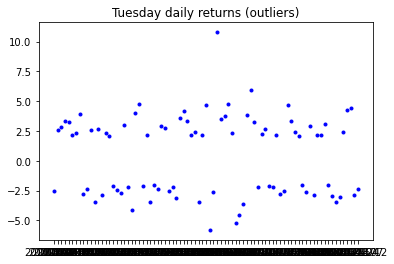

In [47]:
plt.plot(df_Tuesday['Date'], df_Tuesday['Daily % return'], 'b.')
plt.title("Tuesday daily returns (outliers)") 

In [48]:
#importing statistics to calucate median price
import statistics

In [49]:
dr_Tuesday= df_Tuesday['Daily % return']

In [50]:
#calculating median price
median_Tuesday_high_volatility = statistics.median(dr_Tuesday)
#rounding to 2 decimal places
median_Tuesday_high_volatility = round(median_Tuesday_high_volatility, 2)
print("Median price for Tuesday outliers is:", median_Tuesday_high_volatility,"%")

Median price for Tuesday outliers is: 2.17 %


Text(0.5, 1.0, 'Thursday daily returns (outliers)')

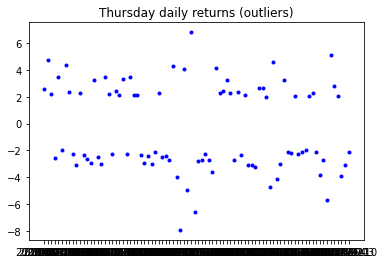

In [51]:
plt.plot(df_Thursday['Date'], df_Thursday['Daily % return'], 'b.')
plt.title("Thursday daily returns (outliers)") 

In [52]:
dr_Thursday= df_Thursday['Daily % return']

In [53]:
#calculating median price
median_Thursday_high_volatility = statistics.median(dr_Thursday)
#rounding to 2 decimal places
median_Thursday_high_volatility = round(median_Thursday_high_volatility, 2)
print("Median price for Thursday outliers is:", median_Thursday_high_volatility,"%")

Median price for Thursday outliers is: -2.12 %


# Let's compare values to whole data set for Tuesday and Thursday

Tuesday first

In [54]:
df_Tuesday_whole = df[df['Day of week'] == 'Tuesday']

In [55]:
df_Tuesday_whole

,Date,Open,Close,Daily % return,Day of week
1,2000-02-15,1389.939941,1402.050049,0.871268,Tuesday
5,2000-02-22,1346.089966,1352.170044,0.451684,Tuesday
10,2000-02-29,1348.050049,1366.420044,1.362709,Tuesday
15,2000-03-07,1391.280029,1355.619995,-2.563110,Tuesday
20,2000-03-14,1383.619995,1359.150024,-1.768547,Tuesday
...,...,...,...,...,...
5261,2021-01-12,3801.620117,3801.189941,-0.011316,Tuesday
5265,2021-01-19,3781.879883,3798.909912,0.450306,Tuesday
5270,2021-01-26,3862.959961,3849.620117,-0.345327,Tuesday
5275,2021-02-02,3791.840088,3826.310059,0.909057,Tuesday


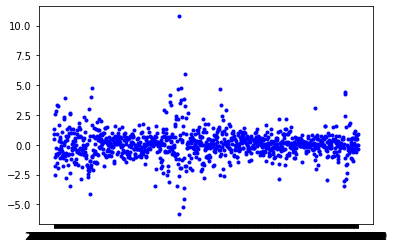

In [56]:
plt.plot(df_Tuesday_whole['Date'], df_Tuesday_whole['Daily % return'], 'b.')

In [57]:
df_Tuesday_whole['Daily % return']

1       0.871268
5       0.451684
10      1.362709
15     -2.563110
20     -1.768547
          ...   
5261   -0.011316
5265    0.450306
5270   -0.345327
5275    0.909057
5280    0.018923
Name: Daily % return, Length: 1082, dtype: float64

In [58]:
daily_return_Tuesday = df_Tuesday_whole['Daily % return']

In [59]:
#calculating median price
median_Tuesday = statistics.median(daily_return_Tuesday)
#rounding to 2 decimal places
median_Tuesday = round(median_Tuesday, 2)
print("Median price for Tuesday is:", median_Tuesday,"%")

Median price for Tuesday is: 0.04 %


Time to check Thursday

In [60]:
df_Thursday_whole = df[df['Day of week'] == 'Thursday']

In [61]:
df_Thursday_whole

,Date,Open,Close,Daily % return,Day of week
3,2000-02-17,1387.670044,1388.260010,0.042515,Thursday
7,2000-02-24,1360.689941,1353.430054,-0.533545,Thursday
12,2000-03-02,1379.189941,1381.760010,0.186346,Thursday
17,2000-03-09,1366.699951,1401.689941,2.560181,Thursday
22,2000-03-16,1392.150024,1458.469971,4.763851,Thursday
...,...,...,...,...,...
5263,2021-01-14,3814.979980,3795.540039,-0.509569,Thursday
5267,2021-01-21,3857.459961,3853.070068,-0.113803,Thursday
5272,2021-01-28,3755.750000,3787.379883,0.842172,Thursday
5277,2021-02-04,3836.659912,3871.739990,0.914339,Thursday


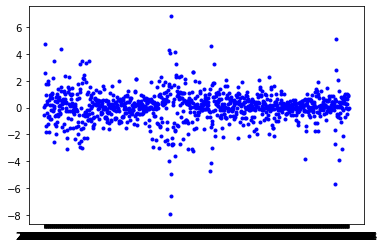

In [62]:
plt.plot(df_Thursday_whole['Date'], df_Thursday_whole['Daily % return'], 'b.')

In [63]:
daily_return_Thursday = df_Thursday_whole['Daily % return']

In [64]:
#calculating median price
median_Thursday = statistics.median(daily_return_Thursday)
#rounding to 2 decimal places
median_Thursday = round(median_Thursday, 2)
print("Median price for Thursday is:", median_Thursday,"%")

Median price for Thursday is: 0.09 %


# Conclucions:

The most volitiles days of week for SP500 are Tuesday and Thursday. Median prices shows that Tuesday outliers returns a positive value. Checking Tuesday returns for last 21 years confirms that. Median price for Thursday all data set shows that median price is twice as big as Tuesdays median. However looking at Thursday outliers median we can notice that it is negative. Therefore, we might be tempted for conclusion that average Thursday sessions are positive, but if there will be a high variation of price in Wall street session (above 2%), there is a high chance that SP500 will end day with huge minus.

**Ofcourse past results don't guarantee the same results in future. Main target of this project was to filter possible best day of week, for daytrading strategy.**